# 1. Crear el proyecto

# 2. Crear el entorno

```bash
ENTORNO="data"
conda deactivate
conda env remove --name $ENTORNO
conda create -y -n $ENTORNO python=3.13
conda activate $ENTORNO
conda install -y -n $ENTORNO ipykernel
python -m ipykernel install --user --name=$ENTORNO
conda activate $ENTORNO
````

# 3. EDA: exploratory data analysis

In [33]:
# hacer cosas
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
# Exploración de los datos

In [50]:
df.isna().sum().values.sum()

np.int64(869)

In [7]:
# Contexto

df.dtypes

df.columns
df.shape

df.head()
df.info()
df.describe()


df.isna().sum() # nulos
df.duplicated # duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df["age_group"] = pd.cut(df["age"],
                        bins=[0, 12, 18, 35, 60, 100],
                        labels=["Kid", "Teenager", "otra cosa", "otra más", "el último"])

In [11]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
103,0,3,male,33.0,0,0,8.6542,S,Third,man,True,NaN,Southampton,no,True,otra cosa


In [12]:
df["sex_num"] = df["sex"].map({"male": 0, "female":1})

In [15]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,sex_num
129,0,3,male,45.0,0,0,6.975,S,Third,man,True,NaN,Southampton,no,True,otra más,0


In [16]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,sex_num
276,0,3,female,45.0,0,0,7.75,S,Third,woman,False,NaN,Southampton,no,True,otra más,1


In [20]:
df.drop(["deck",	"embark_town"], axis=1, inplace=True)

In [23]:
df.shape[0]

891

In [22]:
df["age"].isna().sum()

np.int64(177)

In [27]:
df["age"].mean()

np.float64(29.69911764705882)

In [28]:
df["age"].median()

np.float64(28.0)

In [24]:
df["age_new"] = df["age"].fillna(df["age"].mean())

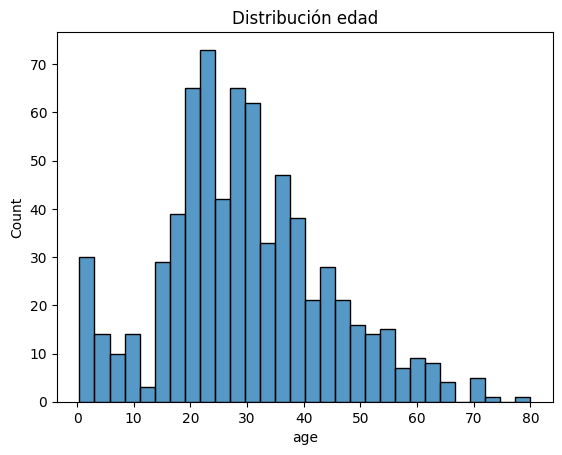

In [37]:
sns.histplot(df["age"], bins=30)
plt.title("Distribución edad");

In [39]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
841,0,2,male,16.0,0,0,10.5,S,Second,man,True,NaN,Southampton,no,True


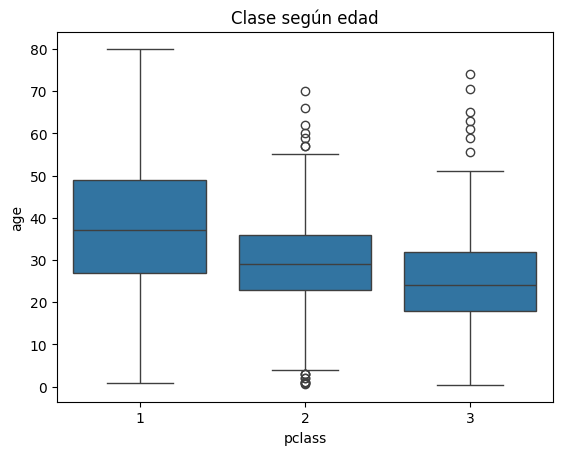

In [ ]:
def plot_class_age (df):
    sns.boxplot(x="pclass", y="age", data=df)
    plt.title("Clase según edad")
    plt.savefig("edadyclase.png")

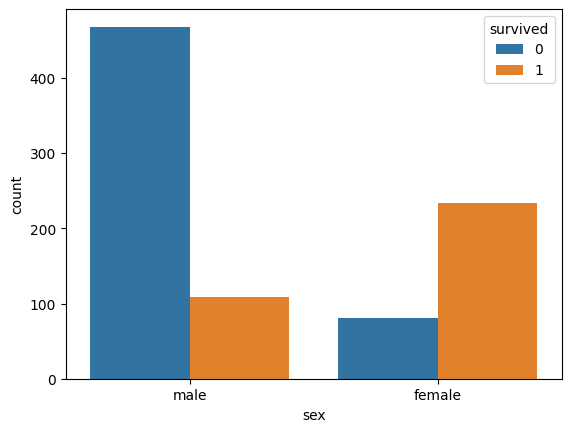

In [46]:
sns.countplot(x="sex", hue="survived", data=df);
# hue, tono

# 4. ENCAPSULAR: de líneas a funciones

In [ ]:
# Definir funciones
# Repartirlas por la estructura de archivos que hemos creado

# 5. ESTRUCTURA

In [1]:
"""
notebook.ipynb
README.md
main.py
src/
    exploration.py
    transformation.py
    visualization.py
data/
images/
"""

'\nmain.py\nsrc/\n    exploration.py\n    transformation.py\n    visualization.py\nREADME.md\ndata\nimages\n'

# 6. Llevarnos las funciones a los archivos que correspondan: separar definiciones de invocaciones

# 7. IMPORTAR nuestro propio código definido para ejecutarlo: notebook

Este dataset tiene: 891 filas y 15 columnas
Tiene un total de: 869 valores nulos


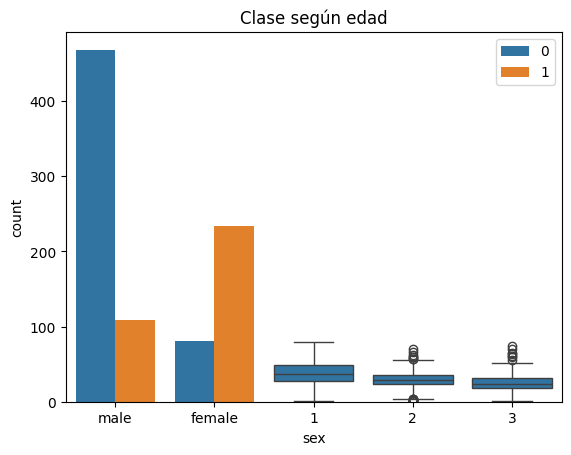

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

import src.exploration as exp
import src.transformation as trs
import src.visualization as viz

df = sns.load_dataset("titanic")
exp.describe_df(df)

df_1 = trs.edad(df)
df_2 = trs.sex_encoding(df_1)

viz.plot_sex_survival(df_2)
viz.plot_class_age(df_2)


# 8. De notebook -> main.py

In [ ]:
## 8.1. if name == main

In [ ]:
# https://realpython.com/if-name-main-python/


In [ ]:
## 8.2. archivo __init__.py 

# 9. Eejcutar: python `main.py`

# 10. Generar requirementsd.txt y el .yml